> # Loan Approval Prediction

Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.

## 1. Import Packages & Data

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import SVC

In [2]:
#Read CSV data
data = pd.read_csv("loan_status.csv")

In [3]:
#preview data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. EDA

In [4]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Check missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Gender - Missing Values

In [6]:
# percent of missing "Gender" 
print('Percent of missing "Gender" records is %.2f%%' %((data['Gender'].isnull().sum()/data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

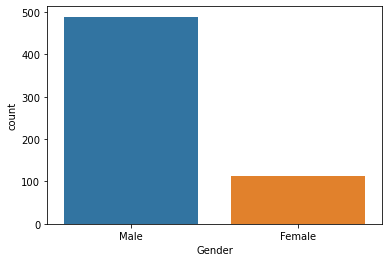

In [7]:
print("Number of people who take a loan group by gender :")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data)

### Married - Missing Values

In [8]:
# percent of missing "Married" 
print('Percent of missing "Married" records is %.2f%%' %((data['Married'].isnull().sum()/data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

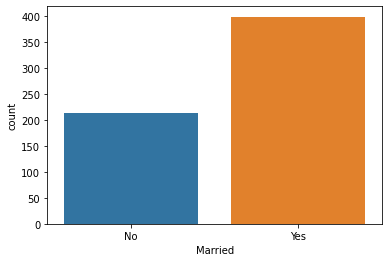

In [9]:
print("Number of people who take a loan group by marital status :")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data)

### Dependents- Missing Values

In [10]:
# percent of missing "Dependents" 
print('Percent of missing "Dependents" records is %.2f%%' %((data['Dependents'].isnull().sum()/data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

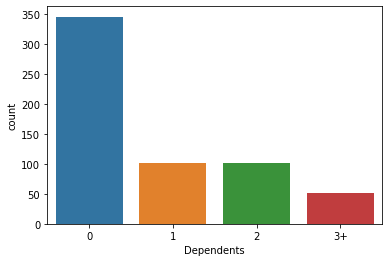

In [11]:
print("Number of people who take a loan group by dependents :")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data)

### Self Employed - Missing Values

In [12]:
# percent of missing "Self_Employed" 
print('Percent of missing "Self_Employed" records is %.2f%%' %((data['Self_Employed'].isnull().sum()/data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

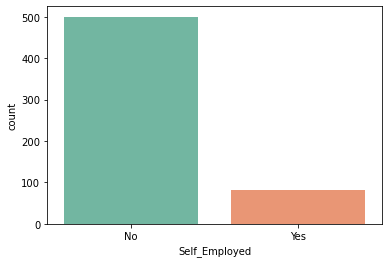

In [13]:
print("Number of people who take a loan group by self employed :")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette = 'Set2')

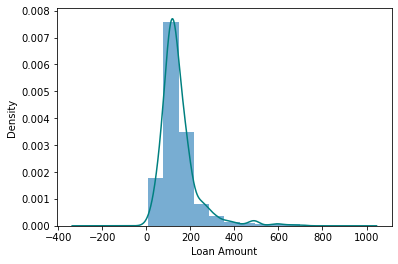

In [14]:
ax = data["LoanAmount"].hist(density=True,alpha=0.6)
data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

Number of people who take a loan group by loan amount term :
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

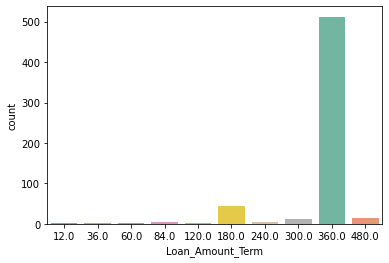

In [15]:
print("Number of people who take a loan group by loan amount term :")
print(data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=data, palette = 'Set2')

Number of people who take a loan group by credit history :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

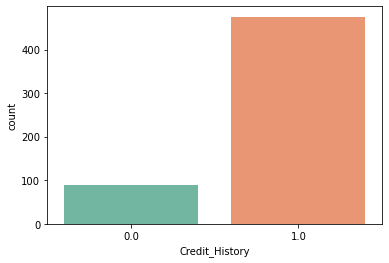

In [16]:
print("Number of people who take a loan group by credit history :")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette = 'Set2')

## 3. Final Adjustments to Data

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

* If "Gender" is missing for a given row, I'll impute with Male (most common answer).
* If "Married" is missing for a given row, I'll impute with yes (most common answer).
* If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
* If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
* If "LoanAmount" is missing for a given row, I'll impute with mean of data.
* If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
* If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [17]:
data = data.copy()
data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)
data['Married'].fillna(data['Married'].value_counts().idxmax(), inplace=True)
data['Dependents'].fillna(data['Dependents'].value_counts().idxmax(), inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().idxmax(), inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(skipna=True), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].value_counts().idxmax(), inplace=True)

In [18]:
#Check missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0,'Yes' : 1}
dependents_stat = {'0':0,'1':1,'2':2,'3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}

data['Gender'] = data['Gender'].replace(gender_stat)
data['Married'] = data['Married'].replace(yes_no_stat)
data['Dependents'] = data['Dependents'].replace(dependents_stat)
data['Education'] = data['Education'].replace(education_stat)
data['Self_Employed'] = data['Self_Employed'].replace(yes_no_stat)
data['Property_Area'] = data['Property_Area'].replace(property_stat)

In [20]:
#Preview data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [21]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## 4. Making Prediction

In [22]:
from sklearn.model_selection import train_test_split

X = data[['Gender', 'Married', 'Dependents', 'Education',\
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',\
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data['Loan_Status']

In [23]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
class_models = ['SVM', 'KNN', 'DECISION TREE', 'RANDOM FOREST', 'GRADIENT BOOSTING' ]
scores = []

In [25]:
model = SVC()
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
#print the accuracy of the model
print("Accuracy of SVM model is : ", model.score(X_test, y_test))

Accuracy of SVM model is :  0.6829268292682927


In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
#print the accuracy of the model
print("Accuracy of KNN model is : ", model.score(X_test, y_test))

Accuracy of KNN model is :  0.6097560975609756


In [27]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
#print the accuracy of the model
print("Accuracy of Decision Tree model is : ", model.score(X_test, y_test))

Accuracy of Decision Tree model is :  0.7235772357723578


In [28]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
#print the accuracy of the model
print("Accuracy of Random Forest model is : ", model.score(X_test, y_test))

Accuracy of Random Forest model is :  0.7723577235772358


In [29]:
model=GradientBoostingClassifier()
model.fit(X_train, y_train)
scores.append(model.score(X_test, y_test))
#print the accuracy of the model
print("Accuracy of Gradient Boosting model is : ", model.score(X_test, y_test))

Accuracy of Gradient Boosting model is :  0.7723577235772358


In [30]:
scores

[0.6829268292682927,
 0.6097560975609756,
 0.7235772357723578,
 0.7723577235772358,
 0.7723577235772358]

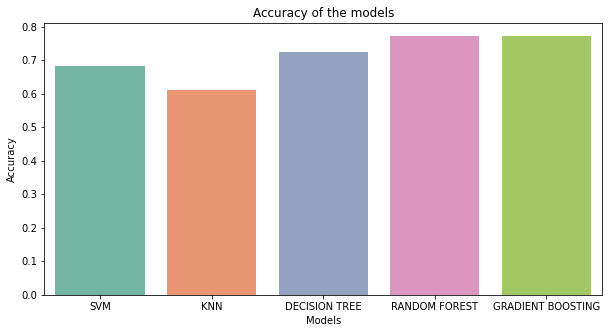

In [31]:
#visualize the scores of the models 
plt.figure(figsize=(10,5))
sns.barplot(x=class_models, y=scores, palette='Set2')
plt.title('Accuracy of the models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()